In [1]:
# Importing libraries
# Pandas is an open-source library that is made mainly for working with relational or labeled data both easily and intuitively. It provides various data structures and operations for manipulating numerical data and time series. 
#The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Weather dataset.csv')

In [3]:
df =pd.DataFrame(data=data)
print(df)

     Sno  YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0      0  1901  17.99  19.43  23.49  26.41  28.28  28.60  27.49  26.98  26.26   
1      1  1902  19.00  20.39  24.10  26.54  28.68  28.44  27.29  27.05  25.95   
2      2  1903  18.32  19.79  22.46  26.03  27.93  28.41  28.04  26.63  26.34   
3      3  1904  17.77  19.39  22.95  26.73  27.83  27.85  26.84  26.73  25.84   
4      4  1905  17.40  17.79  21.78  24.84  28.32  28.69  27.67  27.47  26.29   
..   ...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
112  112  2013  18.88  21.07  24.53  26.97  29.06  28.24  27.50  27.22  26.87   
113  113  2014  18.81  20.35  23.34  26.91  28.45  29.42  28.07  27.42  26.61   
114  114  2015  19.02  21.23  23.52  26.52  28.82  28.15  28.03  27.64  27.04   
115  115  2016  20.92  23.58  26.61  29.56  30.41  29.70  28.18  28.17  27.72   
116  116  2017  20.59  23.08  25.58  29.17  30.47  29.44  28.31  28.12  28.11   

       OCT    NOV    DEC  


(array([12., 12., 11., 12., 11., 12., 12., 11., 12., 12.]),
 array([1901. , 1912.6, 1924.2, 1935.8, 1947.4, 1959. , 1970.6, 1982.2,
        1993.8, 2005.4, 2017. ]),
 <BarContainer object of 10 artists>)

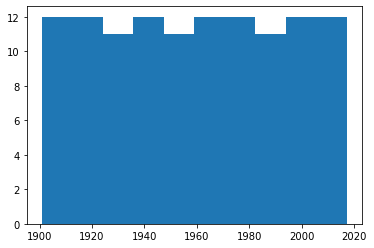

In [4]:
plt.hist(df['YEAR'])

In [5]:
## Head shows first 5 rows
data.head()

,Sno,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [6]:
## Head shows first 10 rows
data.head(10)

,Sno,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71
5,5,1906,17.50,19.14,22.21,26.53,29.06,28.02,27.46,26.82,26.23,24.75,21.93,19.55
6,6,1907,19.27,19.42,22.03,26.98,27.52,27.66,27.28,26.38,26.26,24.72,22.11,18.46
7,7,1908,18.35,19.73,22.93,27.06,28.07,28.49,27.16,26.41,25.74,24.25,21.06,18.15
8,8,1909,17.79,19.05,23.40,25.76,27.97,27.67,26.56,26.43,25.47,24.37,22.01,18.86
9,9,1910,18.14,19.72,22.90,25.96,28.36,27.72,26.93,26.61,25.98,24.04,20.72,18.05


In [7]:
# tail shows last 5 rows
data.tail()

,Sno,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
112,112,2013,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,113,2014,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,114,2015,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,115,2016,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89
116,116,2017,20.59,23.08,25.58,29.17,30.47,29.44,28.31,28.12,28.11,27.24,23.92,21.47


In [8]:
#The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sno     117 non-null    int64  
 1   YEAR    117 non-null    int64  
 2   JAN     117 non-null    float64
 3   FEB     117 non-null    float64
 4   MAR     117 non-null    float64
 5   APR     117 non-null    float64
 6   MAY     117 non-null    float64
 7   JUN     117 non-null    float64
 8   JUL     117 non-null    float64
 9   AUG     117 non-null    float64
 10  SEP     117 non-null    float64
 11  OCT     117 non-null    float64
 12  NOV     117 non-null    float64
 13  DEC     117 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 12.9 KB


In [9]:
#Let's check the duplicate data in data set
data.duplicated().sum()

0

In [10]:
#The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.
data.describe(include='all')

,Sno,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,58.000000,1959.000000,18.423248,20.137949,23.434188,26.514103,28.386410,28.300940,27.369231,26.940085,26.342650,24.742051,21.765726,19.173333
std,33.919021,33.919021,0.612963,0.900944,0.862825,0.750740,0.644678,0.460603,0.345920,0.348876,0.387789,0.563152,0.634183,0.635912
min,0.000000,1901.000000,17.250000,17.790000,21.780000,24.840000,26.970000,27.330000,26.480000,26.210000,25.470000,23.520000,20.590000,17.980000
25%,29.000000,1930.000000,18.070000,19.470000,22.840000,26.000000,27.950000,28.020000,27.150000,26.730000,26.110000,24.390000,21.320000,18.780000
50%,58.000000,1959.000000,18.350000,19.990000,23.330000,26.540000,28.340000,28.250000,27.340000,26.900000,26.310000,24.670000,21.720000,19.180000
75%,87.000000,1988.000000,18.720000,20.550000,23.930000,26.910000,28.820000,28.580000,27.530000,27.150000,26.500000,24.920000,22.150000,19.550000
max,116.000000,2017.000000,20.920000,23.580000,26.610000,29.560000,30.780000,29.880000,28.470000,28.170000,28.110000,27.240000,23.920000,21.890000


In [11]:
data.isnull().sum()

Sno     0
YEAR    0
JAN     0
FEB     0
MAR     0
APR     0
MAY     0
JUN     0
JUL     0
AUG     0
SEP     0
OCT     0
NOV     0
DEC     0
dtype: int64

array([[<AxesSubplot:title={'center':'Sno'}>,
        <AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'JAN'}>,
        <AxesSubplot:title={'center':'FEB'}>],
       [<AxesSubplot:title={'center':'MAR'}>,
        <AxesSubplot:title={'center':'APR'}>,
        <AxesSubplot:title={'center':'MAY'}>,
        <AxesSubplot:title={'center':'JUN'}>],
       [<AxesSubplot:title={'center':'JUL'}>,
        <AxesSubplot:title={'center':'AUG'}>,
        <AxesSubplot:title={'center':'SEP'}>,
        <AxesSubplot:title={'center':'OCT'}>],
       [<AxesSubplot:title={'center':'NOV'}>,
        <AxesSubplot:title={'center':'DEC'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

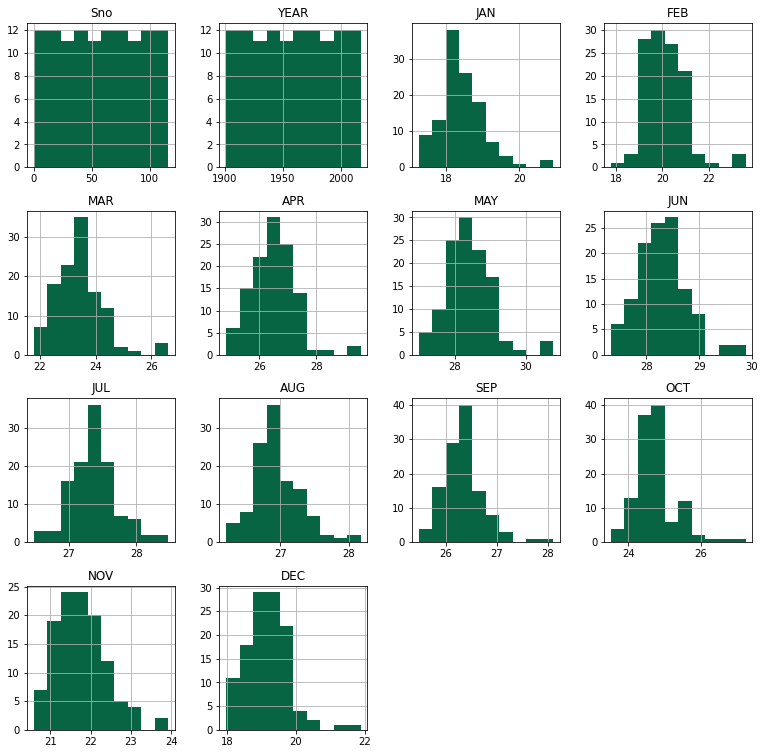

In [12]:
# Fill the zeros with Nan values
data.hist(figsize = (13,13), color="#076543")

In [13]:
#corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored. Note: The correlation of a variable with itself is 1.
data.corr()

,Sno,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Sno,1.000000,1.000000,0.424095,0.531905,0.495396,0.408116,0.240393,0.320169,0.373547,0.516766,0.621623,0.476883,0.631653,0.656462
YEAR,1.000000,1.000000,0.424095,0.531905,0.495396,0.408116,0.240393,0.320169,0.373547,0.516766,0.621623,0.476883,0.631653,0.656462
JAN,0.424095,0.424095,1.000000,0.601501,0.456032,0.563134,0.365694,0.375436,0.399126,0.465346,0.546374,0.484244,0.504839,0.502171
FEB,0.531905,0.531905,0.601501,1.000000,0.562856,0.550205,0.467735,0.392240,0.445539,0.444043,0.505202,0.371735,0.446582,0.585669
MAR,0.495396,0.495396,0.456032,0.562856,1.000000,0.627709,0.378081,0.275558,0.248443,0.414879,0.429311,0.331754,0.428112,0.470999
APR,0.408116,0.408116,0.563134,0.550205,0.627709,1.000000,0.542415,0.342737,0.277163,0.459959,0.474800,0.446948,0.420935,0.481461
MAY,0.240393,0.240393,0.365694,0.467735,0.378081,0.542415,1.000000,0.345648,0.292579,0.478585,0.379402,0.406667,0.359000,0.382938
JUN,0.320169,0.320169,0.375436,0.392240,0.275558,0.342737,0.345648,1.000000,0.547269,0.575351,0.440450,0.427834,0.437434,0.451548
JUL,0.373547,0.373547,0.399126,0.445539,0.248443,0.277163,0.292579,0.547269,1.000000,0.612976,0.613086,0.566709,0.597194,0.498380
AUG,0.516766,0.516766,0.465346,0.444043,0.414879,0.459959,0.478585,0.575351,0.612976,1.000000,0.706028,0.683163,0.577769,0.589337


In [14]:
# columns gives column names of features
data.columns

Index(['Sno', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC'],
      dtype='object')

In [15]:
# shape gives number of rows and columns in a tuble
data.shape

(117, 14)

In [16]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sno     117 non-null    int64  
 1   YEAR    117 non-null    int64  
 2   JAN     117 non-null    float64
 3   FEB     117 non-null    float64
 4   MAR     117 non-null    float64
 5   APR     117 non-null    float64
 6   MAY     117 non-null    float64
 7   JUN     117 non-null    float64
 8   JUL     117 non-null    float64
 9   AUG     117 non-null    float64
 10  SEP     117 non-null    float64
 11  OCT     117 non-null    float64
 12  NOV     117 non-null    float64
 13  DEC     117 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 12.9 KB


In [18]:
data['SEP'].value_counts()

26.26    7
26.19    3
26.61    3
26.34    3
26.48    3
        ..
25.83    1
26.37    1
26.24    1
26.80    1
27.04    1
Name: SEP, Length: 74, dtype: int64

In [19]:
#The dtypes property is used to find the dtypes in the DataFrame. This returns a Series with the data type of each column.
data.dtypes

Sno       int64
YEAR      int64
JAN     float64
FEB     float64
MAR     float64
APR     float64
MAY     float64
JUN     float64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

<AxesSubplot:>

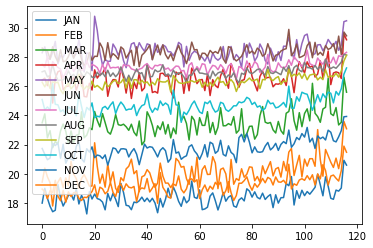

In [22]:
# Plotting all data 
data1 = data.loc[:,['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC']]
data1.plot()

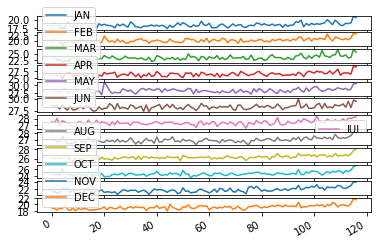

In [23]:
# subplots
data1.plot(subplots = True)
plt.show()

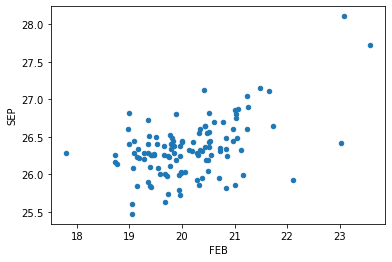

In [24]:
# scatter plot: A scatter plot is a diagram where each value in the data set is represented by a dot. 
data1.plot(kind = "scatter",x="FEB",y = "SEP")
plt.show()

In [25]:
# pandas, a missing value is denoted by NaN
data.isnull()

,Sno,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113,False,False,False,False,False,False,False,False,False,False,False,False,False,False
114,False,False,False,False,False,False,False,False,False,False,False,False,False,False
115,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

In [27]:
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Sno     0
YEAR    0
JAN     0
FEB     0
MAR     0
APR     0
MAY     0
JUN     0
JUL     0
AUG     0
dtype: int64

In [28]:
# Features Selection
# iloc() function enables us to select a particular cell of the dataset, that is, it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.

x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [29]:
# feature selection
feature_cols =['Sno', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC']
x = data[feature_cols]
y = data.YEAR

In [30]:
# remove all the rows that contain a missing value
data.dropna()

,Sno,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,2013,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,113,2014,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,114,2015,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,115,2016,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89


In [31]:
# remove all columns with at least one missing value
columns_with_na_dropped = data.dropna(axis=1)
columns_with_na_dropped.head()

,Sno,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [32]:
from sklearn.model_selection import train_test_split
x = data.drop(['YEAR'],axis=1)
y = data['YEAR']

In [33]:
# USE standard scaler to scale the data
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_scaled= sc.fit_transform(x)

In [34]:
#split Data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_train.shape, y_train.shape

((93, 13), (93,))

In [35]:
x_test.shape, y_test.shape

((24, 13), (24,))

In [36]:
from sklearn.ensemble import RandomForestClassifier

random_f = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 8,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_f.fit(x_train, y_train)
y_pred = random_f.predict(x_test)

In [37]:
print(y_pred)

[1949 1934 1984 2014 1916 2003 1986 1921 1960 1991 1994 2005 1902 1962
 2000 1976 1953 2005 1957 1937 1990 1989 1986 1950]


In [39]:
# Confusion Matrix
#TP (True Positive)
#FP (False Positive)
#TN (True Negative)
#FN (False Negative)
#True Positive: Actually positive (ground truth), predicted as positive (correctly classified)
#True Negative: Actually negative (ground truth), predicted as negative (correctly classified)
#False Positive: Actually negative (ground truth), predicted as positive (misclassified)
#False Negative: Actually positive (ground truth), predicted as negative (misclassified)


#Confusin Matrix
from sklearn.metrics import confusion_matrix
confmat1 = confusion_matrix(y_pred, y_test)
confmat1

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
#F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
#Precision: Correct positive predictions relative to total positive predictions
#Recall: Correct positive predictions relative to total actual positives
import numpy as np
from sklearn.metrics import f1_score

In [47]:
#define array of actual classes
actual = np.repeat([1, 0], repeats=[99, 55])

In [48]:
#define array of predicted classes
pred = np.repeat([1, 0, 1, 0], repeats=[86, 13, 20, 35])

In [49]:
#calculate F1 score
#F1-score is considered one of the best metrics for classification models regardless of class imbalance. F1-score is the weighted average of recall and precision of the respective class. Its best value is 1 and the worst value is 0.
f1_score(actual, pred)

0.8390243902439025